In [1]:
from deal_data_pre.deal_model import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from KNN.KNN import KNNClassifier

In [2]:
data_breast_cancer = load_breast_cancer()  # 了解数据的一些基本信息
data_breast_cancer.feature_names, data_breast_cancer.data.shape, data_breast_cancer.target.shape

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 (569, 30),
 (569,))

In [3]:
data_X, data_y = data_breast_cancer.data, data_breast_cancer.target  # 获取特征数据和样本标签

# 归一化

* 由于要使用的分类算法knn的度量方式使用了欧式距离，为了消除不同变量之间纲量的不同对数据造成的影响，这里主要使用到归一化或者标准化消除纲量

* 对于归一化，使用的计算方法是：**（样本 - 最小值）/ （最大值 - 最小值）**。最大值和最小值容易受到异常值的影响

* 对于标准化，使用的计算方法是：**（样本 - 平均值）/ 标准差**。同样也会受到异常值的影响，但同时也有两个好处：使得数据的均值为零，标准差为1.

---

* 对于两者间的选择：

  1.如果要保留原来数据中标准差反映的潜在权重关系应该要选择归一化
  
  2.如果对于所有变量一视同仁，在计算距离时发挥相同的作用那么应该选择标准化。


In [4]:
data_X = normalization(data_X)  # 对数据进行归一化处理，避免一些数值较大的数据对预测结果造成较大的影响
data_X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

# 留出法--划分数据

使用留出法将数据集按照8:2划分为训练集和测试集

In [5]:
data_X = pd.DataFrame(data_X)  # 这边要先转化为DataFrame数据才可以传入到划分数据的函数中
X_train, X_test, y_train, y_test = retention_method(data_X, data_y)
X_train, X_test = X_train.values, X_test.values  # 将数据从新转化为array

# 创建算法模型，训练预测

In [6]:
kncf_model = KNNClassifier(5)
kncf_model.fit(X_train, y_train)
result = kncf_model.predict(X_test)

# 计算准确率

In [7]:
accuracy = accuracy_sco(y_test,np.array(result))
print(accuracy) 


from sklearn.metrics import accuracy_score
print('\nsklearn中计算的准确率：')
print(accuracy_score(y_test, np.array(result)))

0.9912280701754386

sklearn中计算的准确率：
0.9912280701754386


# 计算AUC

In [8]:
auc_score = calculation_auc(y_test, np.array(result))
print(auc_score)

from sklearn.metrics import roc_auc_score
print('\nsklearn中计算的AUC：')
print(roc_auc_score(y_test, np.array(result)))

0.9871794871794872

sklearn中计算的AUC：
0.9871794871794871


# 绘制散点图

这里使用plt.scatter绘制散点图，并给不同的两类数据弄上不同的标志

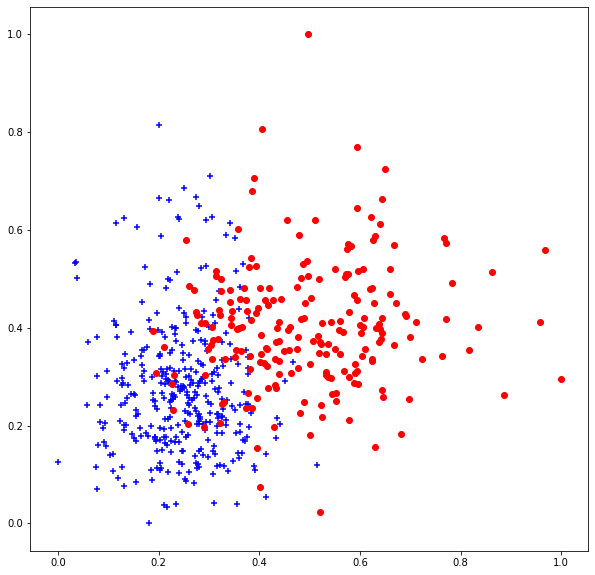

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 10))
index_true, index_false = (data_y == 1), (data_y == 0)  # 查找正类负类，对应位置转变为bool
plt.scatter(data_X.values[:, 0][index_true], data_X.values[:, 1][index_true], color='b', marker='+')
plt.scatter(data_X.values[:, 0][index_false], data_X.values[:, 1][index_false], color='r', marker='o')